In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.Data Preparation

In [2]:
traindf = pd.read_csv("mnist_train.csv")
testdf = pd.read_csv("mnist_test.csv");

In [3]:
traindf.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#convert dataframe to np-array
traindata = traindf.values
testdata = testdf.values
type(traindata)

numpy.ndarray

In [6]:
print(traindata)

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [7]:
x_train = traindata[ :,1:]
y_train= traindata[:,0]
x_test = testdata[:,1:]
y_test = testdata[:,0]

In [9]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print(y_train)

[5 0 4 ... 5 6 8]


In [11]:
print(x_train.shape,y_train.shape)

(60000, 784) (60000,)


In [12]:
#vitualizing some samples 

def image(sample):
    img = sample.reshape(28,28)
    plt.imshow(img,cmap="gray")
    plt.show()


## KNN

In [16]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):
    
    vals = []
    m=x.shape[0]
    for i in range(m):
        d = dist(querypoint , x[i])
        vals.append((d,y[i]))
                    
    vals = sorted(vals)
    vals = vals[:k] 
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

## prediction 

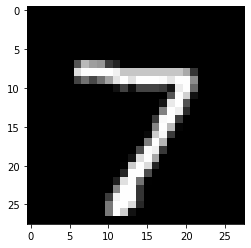

In [17]:
image(x_test[0])

In [19]:
pred = knn(x_train , y_train , x_test[0])
print(int(pred))

(array([7.]), array([5], dtype=int64))
7
